#  `region_interface_areas`

Calculate the interfacial area between all pairs of adjecent regions in a labeled image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
from skimage.morphology import disk
import inspect
inspect.signature(ps.metrics.region_interface_areas)

<Signature (regions, areas, voxel_size=1, strel=None)>

## `regions`
The input image of the pore space partitioned into individual pore regions. Note that zeros in the image (solid phase) will not be considered for area calculation. Let's create a test image:

0it [00:00, ?it/s]

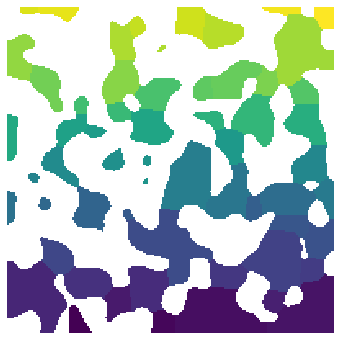

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[200,200])
snow = ps.filters.snow_partitioning(im)
regions = snow.regions
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(regions/im, origin='lower', interpolation='none')
ax.axis(False);

## `areas`

A list containing the areas of each regions, as determined by `region_surface_area`.  Note that the region number and list index are offset by 1, such that the area for region 1 is stored in `areas[0]`. We must first calculate the areas of the regions in the test image, then given the regions and areas, we can calculate the interface areas of each neighbouring region. The `region_interface_areas` method returns a costum object containing the regions connections and interface area of each connection.

Computing region surface area                               :   0%|          | 0/57 [00:00<?, ?it/s]

Computing interfacial area between regions                  :   0%|          | 0/57 [00:00<?, ?it/s]

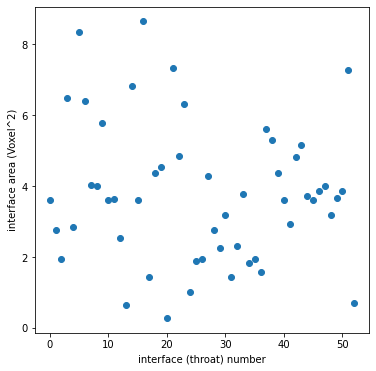

In [3]:
areas = ps.metrics.region_surface_areas(regions=regions)
conns, interface_areas = ps.metrics.region_interface_areas(regions, areas)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(np.arange(0,len(conns)), interface_areas, 'o')
plt.xlabel('interface (throat) number');
plt.ylabel('interface area (Voxel^2)');

## `voxel_size`

By default the voxel_size is 1. We can assign voxel size of the image as the input or apply the scaling on the results after the fact by multiplying the interface_areas to (voxel_size^2).

Computing interfacial area between regions                  :   0%|          | 0/57 [00:00<?, ?it/s]

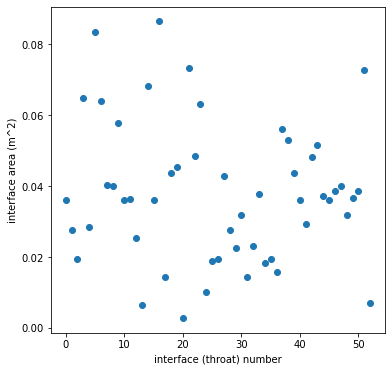

In [4]:
voxel_size=1e-1
conns, interface_areas = ps.metrics.region_interface_areas(regions, areas, voxel_size=voxel_size)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(np.arange(0,len(conns)), interface_areas, 'o')
plt.xlabel('interface (throat) number');
plt.ylabel('interface area (m^2)');

## `strel`

By default the structuring element used to blur the region is a spherical element (or disk) with radius 1. This structuring element is used in the `mesh_region` method, which is called within the `region_interface_areas` function. The blur is
perfomed using a simple convolution filter. The point is to create a greyscale region to allow the marching cubes algorithm (meshing algorithm) some freedom to conform the mesh to the surface.  As the size of ``strel`` increases the region will become increasingly blurred and inaccurate.

Computing interfacial area between regions                  :   0%|          | 0/57 [00:00<?, ?it/s]

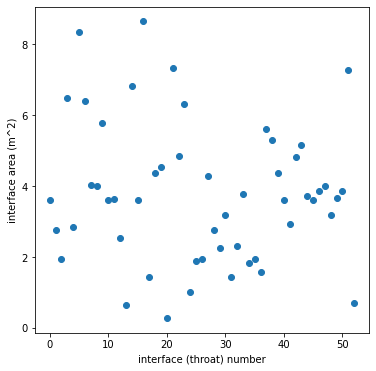

In [5]:
voxel_size=1e-1
conns, interface_areas = ps.metrics.region_interface_areas(regions, areas, strel=disk(10))
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.plot(np.arange(0,len(conns)), interface_areas, 'o')
plt.xlabel('interface (throat) number');
plt.ylabel('interface area (m^2)');